In [1]:
import pandas as pd
from Skriptai.manofunkcijos import *
import seaborn as sns
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import os, sys
import warnings
warnings.filterwarnings('ignore')
db_path = '../../../AdventureWorks2022.db'

In [2]:
# -- Bendras kasmėnesinis pardavimų skaičius? (lentelė: SalesOrderHeader)
# -- Mėnesiniai pardavimai pagal šalį, metus, mėnesį (SalesOrderHeader, SalesTerritory, CountryRegion)
# -- Kurios parduotuvės pasirodo geriausiai? (SalesOrderHeader, Store)
# -- Palyginkite Online versus Store pagal Sales count ir Revenue: (SalesOrderHeader, , jei OnlineOrderFlag = 1,
# -- tai čia Online užsakymas.
# -- atsakykite į klausimą, ar verta uždaryti/plėsti/nekeisti fizinių parduotuvių skaičiaus 
# -- eiti į Online, neiti į online?
# -- Pagrįskite.

# -- -- Koks vidutinis vieno užsakymo dydis kiekvienoje šalyje? 
# -- (SalesOrderHeader,SalesOrderDetail, SalesTerritory, CountryRegion) 

In [ ]:

SalesOrderHeader = query_to_dataframe(db_path,'SELECT * FROM `Sales/SalesOrderHeader`;')
SalesTerritory = query_to_dataframe(db_path,'SELECT * FROM `Sales/SalesTerritory`;')
CountryRegion = query_to_dataframe(db_path,'SELECT * FROM `Person/CountryRegion`;')
Stores = query_to_dataframe(db_path,'SELECT * FROM `Sales/Store`;')[['BusinessEntityID','Name']]



In [4]:
SalesOrderHeader = pd.merge(SalesOrderHeader,SalesTerritory, how='left', on='TerritoryID')
SalesOrderHeader = pd.merge(SalesOrderHeader, CountryRegion, how='left', on='CountryRegionCode')
Persons['SalesPersonID'] = Persons['index'].apply(lambda x: x)
Persons = Persons[['SalesPersonID','BusinessEntityID']]
Stores['Store'] = Stores['Name'].apply(lambda x: x)
Stores = Stores[['Store', 'BusinessEntityID']]
SalesOrderHeader = pd.merge(SalesOrderHeader, Persons, how='left',on='SalesPersonID')
SalesOrderHeader = pd.merge(SalesOrderHeader, Stores, how='left', on='BusinessEntityID')

In [5]:
SalesOrderHeader['Year'] = pd.DatetimeIndex(SalesOrderHeader['OrderDate']).year
SalesOrderHeader['Month'] = pd.DatetimeIndex(SalesOrderHeader['OrderDate']).month
SalesOrderHeader['Y'] = SalesOrderHeader['Year'].apply(lambda x: str(x))
SalesOrderHeader['M'] = SalesOrderHeader['Month'].apply(lambda x: str(x) if x>= 10 else '0'+str(x))
SalesOrderHeader['MonthKey'] = SalesOrderHeader['Y']+SalesOrderHeader['M']
SalesOrderHeader['Metai-Mėn'] = SalesOrderHeader['Y']+'-'+SalesOrderHeader['M']
SalesOrderHeader['MonthKey'] = SalesOrderHeader['MonthKey'].apply(lambda x: int(x))
SalesOrderHeader['Country'] = SalesOrderHeader['Name_y'].apply(lambda x: x)
SalesOrderHeader['Store_Type'] = SalesOrderHeader['OnlineOrderFlag'].apply(lambda x: 'Fizinė' if x == 0 else 'Online')

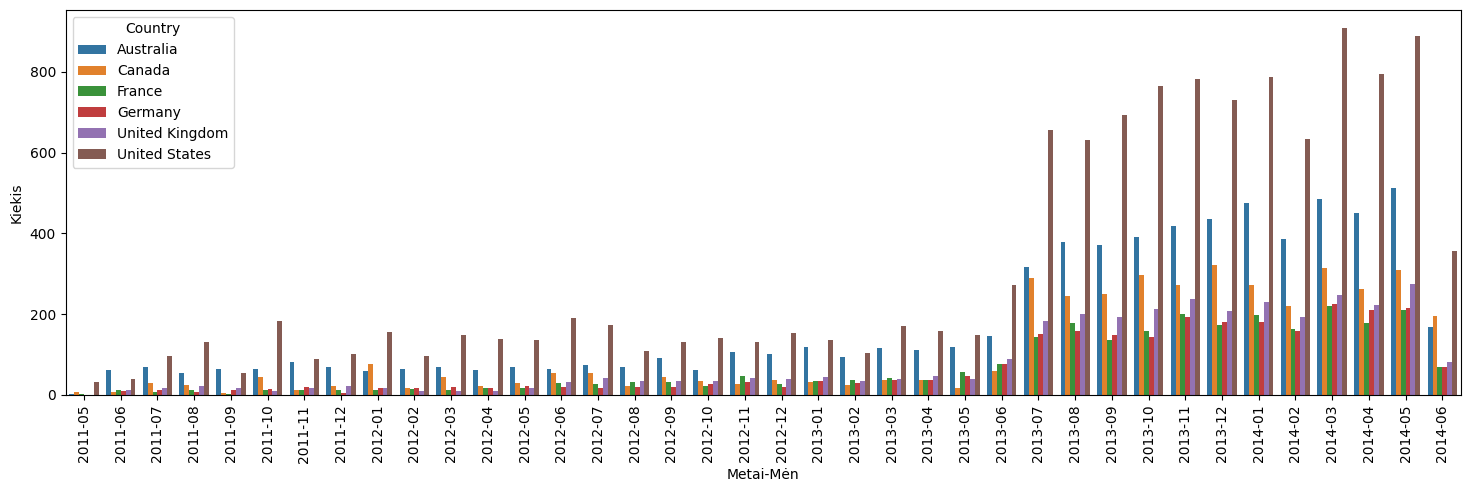

In [6]:
dfx = SalesOrderHeader.groupby(['Country','Metai-Mėn'])['SubTotal'].count().reset_index()
fig, axes = plt.subplots(figsize=(18, 5))
sns.barplot(data=dfx,x = 'Metai-Mėn', y='SubTotal', hue='Country', ax=axes)
axes.set(ylabel='Kiekis')
plt.xticks(rotation = 90)
plt.show()

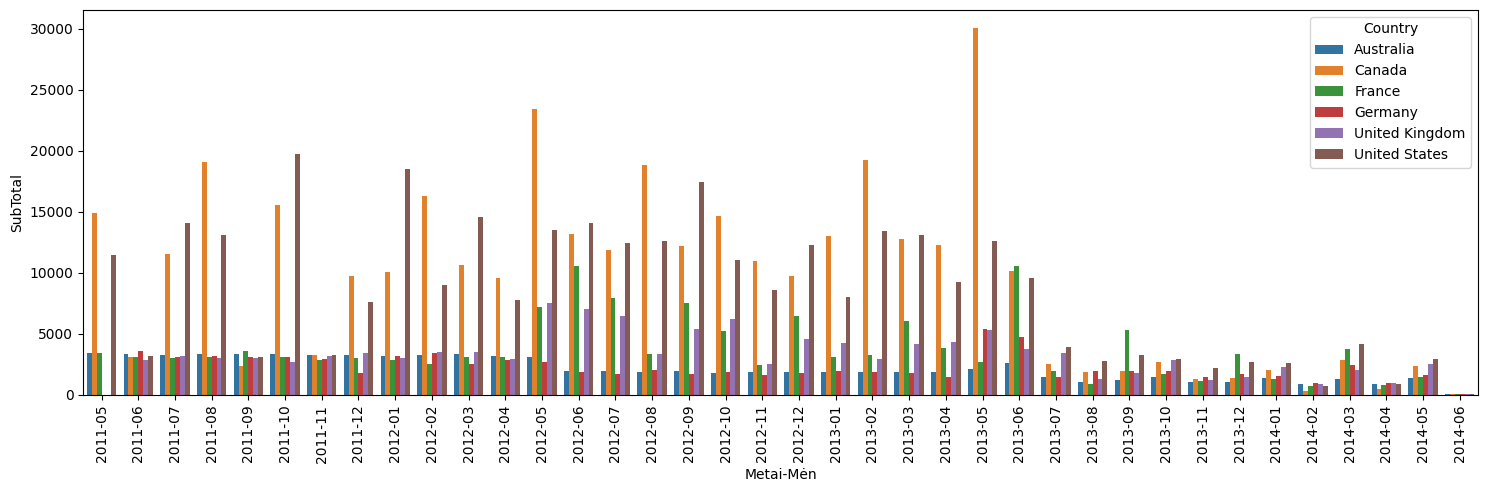

In [7]:
dfx = SalesOrderHeader.groupby(['Country','MonthKey','Metai-Mėn'])['SubTotal'].mean().reset_index()
fig, axes = plt.subplots(figsize=(18, 5))
sns.barplot(data=dfx,x = 'Metai-Mėn', y='SubTotal', hue='Country', ax=axes)
plt.xticks(rotation = 90)
plt.show()

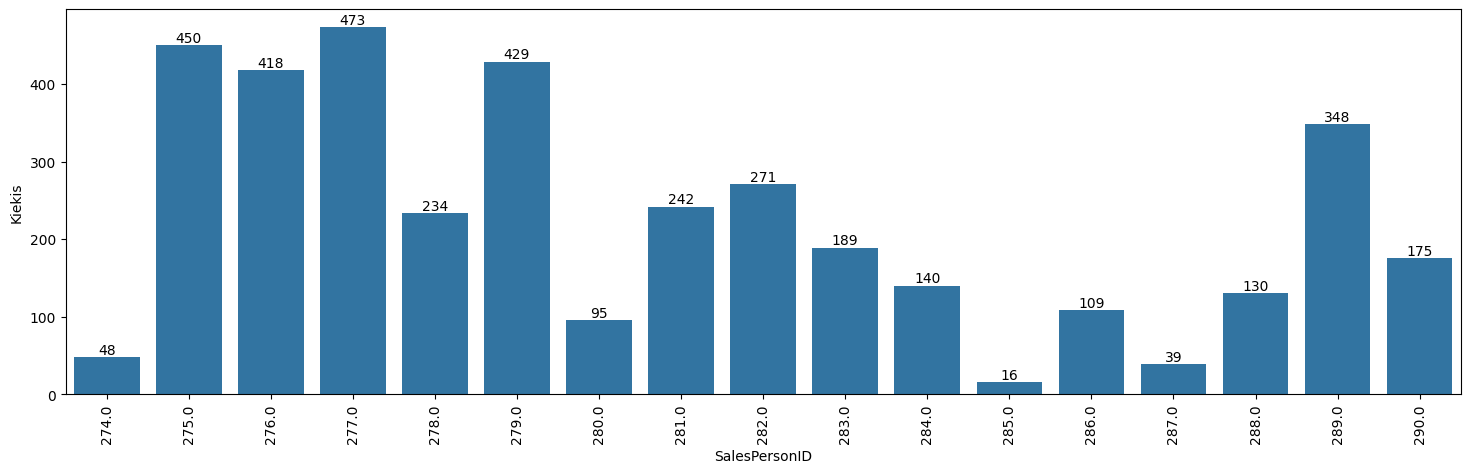

In [8]:
dfx = SalesOrderHeader.groupby(['SalesPersonID'])['SubTotal'].count().reset_index().sort_values(by='SubTotal', ascending=False)
fig, axes = plt.subplots(figsize=(18, 5))
ax = sns.barplot(data=dfx,x = 'SalesPersonID', y='SubTotal', ax=axes)
axes.set(ylabel='Kiekis')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

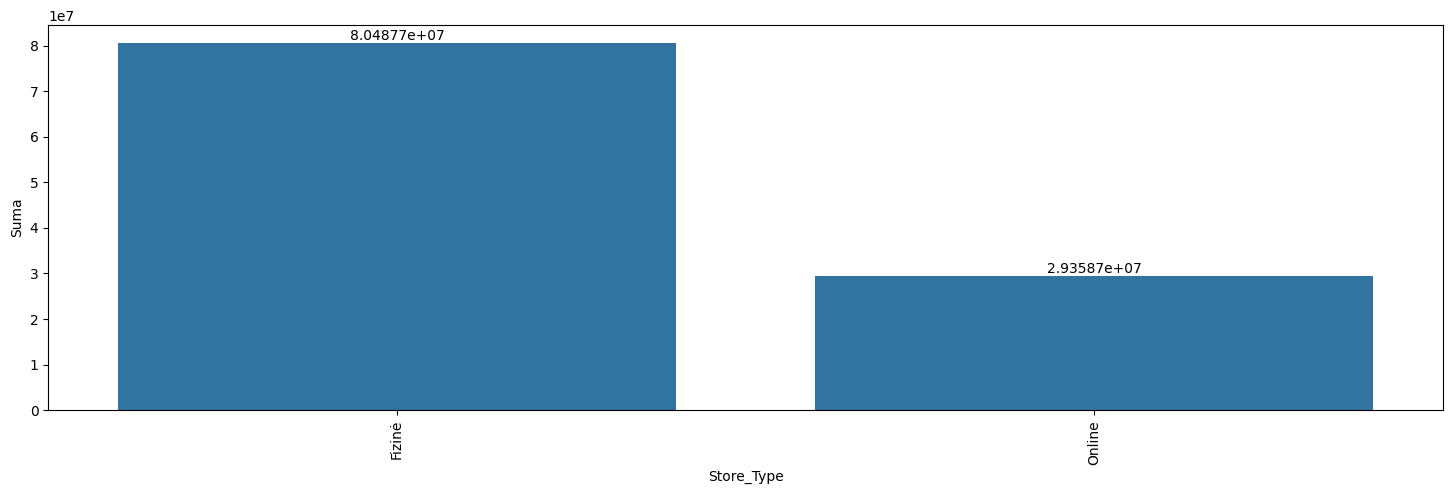

In [12]:
dfx = SalesOrderHeader.groupby(['Store_Type'])['SubTotal'].sum().reset_index().sort_values(by='SubTotal', ascending=False)
fig, axes = plt.subplots(figsize=(18, 5))
ax = sns.barplot(data=dfx,x = 'Store_Type', y='SubTotal', ax=axes)
axes.set(ylabel='Suma')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

In [15]:
Destytojo = query_to_dataframe(db_path,'SELECT CASE WHEN OnlineOrderFlag = 1 THEN 'Online' ELSE 'Store' END AS OrderOrigin, strftime('%Y' , OrderDate) AS OrderYear, strftime('%m' , OrderDate) AS OrderMonth, COUNT(SalesOrderId) AS TotalSales, SUM(TotalDue) AS totalRevenue FROM `Sales/SalesOrderHeader` GROUP BY strftime('%Y' , OrderDate), strftime('%m' , OrderDate), OnlineOrderFlag ORDER BY OrderOrigin, OrderYear DESC, OrderMonth DESC;')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3058057263.py, line 1)